In [45]:
from __future__ import print_function #for compatibility beteen python2 and python3

# Find data on the portal
using DHS data on shelter population obtained with the following steps from the website

using DHS data on shelter population obtained with the following steps from the website

https://opendata.cityofnewyork.us/ -> Data

https://opendata.cityofnewyork.us/data/ -> Department of Transportation (DOT) 

https://data.cityofnewyork.us/Transportation/Street-Pavement-Rating/2cav-chmn/ -> Street Pavement Rating

https://data.cityofnewyork.us/api/views/77fd-dby5/rows.csv?accessType=DOWNLOAD/ -> The CSV file link

# Solution 1: Download from the portal

In [47]:
!curl https://data.cityofnewyork.us/api/views/77fd-dby5/rows.csv?accessType=DOWNLOAD > dshstreet.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.3M    0 14.3M    0     0  2808k      0 --:--:--  0:00:05 --:--:-- 2990k


In [48]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ml6506/PUIdata


In [49]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ml6506/PUIdata


In [50]:
!ls $PUIDATA

In [51]:
# move the data
!mv dshstreet.csv $PUIDATA

In [52]:
#test if the data is there
!ls $PUIDATA

dshstreet.csv


# Read the data with Pandas

In [53]:
#read in the data with pandas
import pandas as pd
dhs = pd.read_csv("%s/dshstreet.csv"%os.getenv("PUIDATA"))

In [54]:
#print the fist 7 lines out
dhs.head(7)

,the_geom,Length,SegmentID,Width,UsageClass,Hagstrom,Bus,Truck,Rating_B,RatingWord,RatingDate,RatingFY_S,Shape_Leng
0,MULTILINESTRING ((-74.25272401241558 40.502518...,933,13,30.00,NaN,0,0,0,0,NR,11/30/1899 12:00:00 AM +0000,0,932.401737
1,MULTILINESTRING ((-74.25299942180904 40.506881...,205,31,35.67,L,0,0,0,8,GOOD,01/31/2018 12:00:00 AM +0000,2018,426.919196
2,MULTILINESTRING ((-74.25287637435896 40.507625...,295,32,30.92,P,1,0,1,9,GOOD,09/25/2017 12:00:00 AM +0000,2018,291.756748
3,MULTILINESTRING ((-74.25287637435896 40.507625...,229,33,33.58,L,0,0,0,8,GOOD,09/27/2017 12:00:00 AM +0000,2018,273.250801
4,MULTILINESTRING ((-74.251380926093 40.50011392...,221,48,30.00,NaN,0,0,0,0,NR,11/30/1899 12:00:00 AM +0000,0,428.590714
5,MULTILINESTRING ((-74.25070987612833 40.500472...,252,49,30.00,NaN,0,0,0,0,NR,11/30/1899 12:00:00 AM +0000,0,254.031494
6,MULTILINESTRING ((-74.24977526691939 40.500545...,451,50,30.00,NaN,0,0,0,0,NR,11/30/1899 12:00:00 AM +0000,0,473.439542


In [55]:
#look at the columns available, those are the variables
dhs.columns

Index(['the_geom', 'Length', 'SegmentID', 'Width', 'UsageClass', 'Hagstrom',
       'Bus', 'Truck', 'Rating_B', 'RatingWord', 'RatingDate', 'RatingFY_S',
       'Shape_Leng'],
      dtype='object')

In [56]:
#count how many rows, those are the data points
dhs.size

1055717

In [57]:
#select 2 columns only for plotting
dhs_2c = dhs[['Length', 'Rating_B']]

In [58]:
dhs_2c.head()

,Length,Rating_B
0,933,0
1,205,8
2,295,9
3,229,8
4,221,0


In [60]:
dhs_2c.plot(x="Length", y="Rating_B")

In [61]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


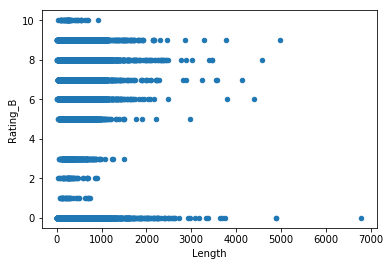

In [65]:
dhs_2c.plot(x="Length", y="Rating_B", kind='scatter');

# solution 2: Use API and download a json file

In [70]:
url="https://data.cityofnewyork.us/resource/77fd-dby5.json"

In [71]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [73]:
# print it out
df.head(8)

,bus,hagstrom,length,rating_b,rating_date,rating_fy_s,rating_word,segment_id,shape_leng,the_geom,truck,usage_class,width
0,0,0,933,0,1899-11-30T00:00:00.000Z,0,NR,13,932.401737,"{'type': 'MultiLineString', 'coordinates': [[[...",0,NaN,30.00
1,0,0,205,8,2018-01-31T00:00:00.000Z,2018,GOOD,31,426.919196,"{'type': 'MultiLineString', 'coordinates': [[[...",0,L,35.67
2,0,1,295,9,2017-09-25T00:00:00.000Z,2018,GOOD,32,291.756748,"{'type': 'MultiLineString', 'coordinates': [[[...",1,P,30.92
3,0,0,229,8,2017-09-27T00:00:00.000Z,2018,GOOD,33,273.250801,"{'type': 'MultiLineString', 'coordinates': [[[...",0,L,33.58
4,0,0,221,0,1899-11-30T00:00:00.000Z,0,NR,48,428.590714,"{'type': 'MultiLineString', 'coordinates': [[[...",0,NaN,30.00
5,0,0,252,0,1899-11-30T00:00:00.000Z,0,NR,49,254.031494,"{'type': 'MultiLineString', 'coordinates': [[[...",0,NaN,30.00
6,0,0,451,0,1899-11-30T00:00:00.000Z,0,NR,50,473.439542,"{'type': 'MultiLineString', 'coordinates': [[[...",0,NaN,30.00
7,1,1,254,8,2018-01-31T00:00:00.000Z,2018,GOOD,163,263.910970,"{'type': 'MultiLineString', 'coordinates': [[[...",1,P,61.83


In [75]:
#now select a date and 2 variables
dhs_3c = df[['rating_date', 'length', 'rating_b']]

In [76]:
dhs_3c.rename(columns = {'rating_date':'Date of Rating', 
               'length':'Length', 
               'rating_b': 'Rating Score'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


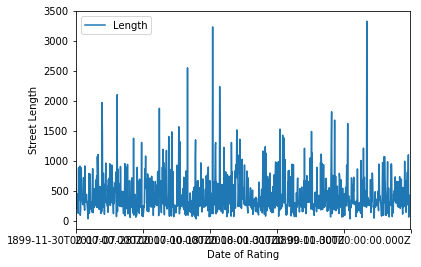

In [79]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Date of Rating', y='Length');
ax.set_ylabel("Street Length");

In [80]:
dhs_3c["Date of Rating"] = dhs_3c["Date of Rating"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


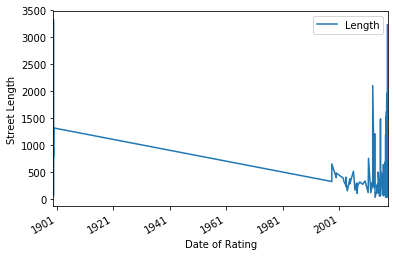

In [82]:
ax = dhs_3c.plot(x='Date of Rating', y='Length')
ax.set_ylabel("Street Length");

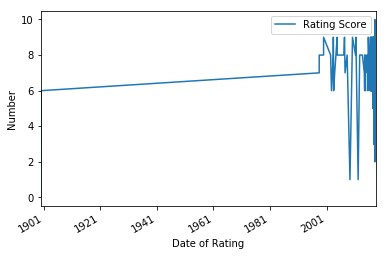

In [85]:
#plot the other columns
ax = dhs_3c.plot(x='Date of Rating', y='Rating Score')
ax.set_ylabel("Number");